<a href="https://colab.research.google.com/github/andreasoledadguerra/MiniProjects/blob/main/KMeansOnARandomGeneratedDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##k-means on a random generated dataset
In this notebook we practice k-means clustering on a random generated dataset with an example.

First of all, we download the libraries:

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

Second of all, we need to set a random seed. We use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>.


In [7]:
np.random.seed(0)

Next we will be making random clusters of points by using the make_blobs class where:

Input

n_samples: The total number of points equally divided among clusters.
Value will be: 5000
centers: The number of centers to generate, or the fixed center locations.
Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
cluster_std: The standard deviation of the clusters.
Value will be: 0.9

Output
X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
y: Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

In [12]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2,-1], [2,-3], [1,1]], cluster_std=0.9)

we display the sctter plot of the randomly generated data.

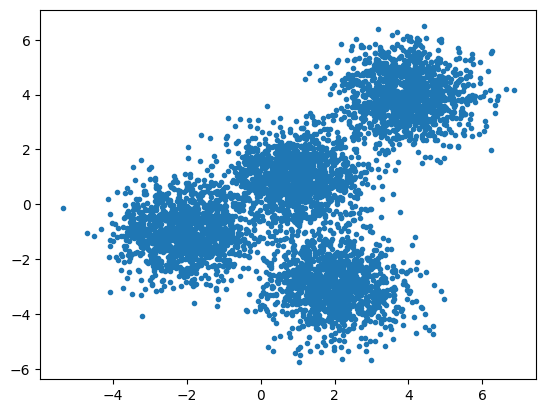

In [15]:
plt.scatter(X[:,0], X[:,1], marker='.')

##Setting up K-Means

Now that we have our random data, let's set up our K-Means Clustering.
The KMeans class has many parameters that can be used, in this example we will be using the next three:



*   **init**: initialization method of the centroids

  - value will be: "k-means++"
  -k-means++: select inital cluster centers for k-mean clustering in a smart way to speed up convergence.


*   **n_clusters**: The nimber of clusters to form as well as the number of centroids to generate.
 - value will be: 4 (since we hve 4 centers)



*  **n_init**: Number of time the k-means algorithm will be run with different centroid seeds. te final results willbe the best output of n_init consecutive runs in terms of inertia.
 - value will be: 12


Inizialize KMeans with these parameters, where the output parameter is called k_means.

In [16]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

now let's fit the KMeans model with the feature matrix we created above, X.

In [17]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans'.labels_ attribute and save at as k_means_labels.

In [18]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

We will lso get the coordintes of the cluster centers using KMeans'.cluster_centers_ and save it as k_means_cluster_centers.

In [20]:
k_means_cluster_centers = k_means.labels_
k_means_cluster_centers

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

##Creating the visual plot
Now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like.

IndexError: ignored

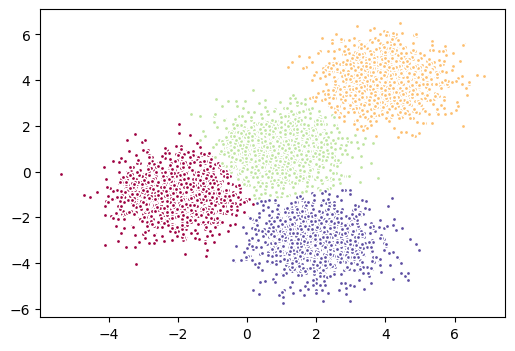

In [34]:
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0,1, len(set(k_means_labels))))
ax = fig.add_subplot(1,1,1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])),colors):
  my_members = (k_means_labels == k)
  cluster_center = k_means_cluster_centers[k]
  ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()